In [1]:
import pandas as pd
from benchmarking_function import benchmark_all_algos
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Load file
sales_df = pd.read_csv("../data/amazon_sales_data/Amazon_Sale_Report.csv")
sales_df.head()

/var/folders/ng/k2fgdpc127b_w75f5vxxx7d80000gn/T/ipykernel_78687/3044165158.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("../data/amazon_sales_data/Amazon_Sale_Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
### Cleaning dataset
columns = ["Date","Order ID","Status", "Qty", "ASIN"]
print(sales_df["Status"].unique())
sales_df = sales_df[sales_df["Status"] != "Cancelled"]
sales_df = sales_df[columns]
print(sales_df.head())

# Take unique IDs of products
stream = []

for _, row in sales_df.iterrows():
    asin = row["ASIN"]
    qty = int(row["Qty"])
    stream.extend([asin] * qty)

true_counts = Counter(stream)

['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']
       Date             Order ID                        Status  Qty  \
1  04-30-22  171-9198151-1101146  Shipped - Delivered to Buyer    1   
2  04-30-22  404-0687676-7273146                       Shipped    1   
4  04-30-22  407-1069790-7240320                       Shipped    1   
5  04-30-22  404-1490984-4578765                       Shipped    1   
6  04-30-22  408-5748499-6859555                       Shipped    1   

         ASIN  
1  B09K3WFS32  
2  B07WV4JV4D  
4  B098714BZP  
5  B08YN7XDSG  
6  B08CMHNWBN  


In [4]:
stream

['B09K3WFS32',
 'B07WV4JV4D',
 'B098714BZP',
 'B08YN7XDSG',
 'B08CMHNWBN',
 'B081WX4G4Q',
 'B08B3XF5MH',
 'B07K3YQLF1',
 'B098117DJ3',
 'B081XCMYXJ',
 'B085HS947T',
 'B09CSSQY4F',
 'B09PY99SVJ',
 'B099FCT65D',
 'B081WT6GG7',
 'B098133PV5',
 'B0983DDPL6',
 'B09HMXJVFS',
 'B09KXV4BN8',
 'B082W7GVH7',
 'B08YYYDN9R',
 'B09G2RQSRZ',
 'B082W8JXJ9',
 'B09LD2W9XL',
 'B08KRXV1QR',
 'B099NR7612',
 'B08YYTCPYX',
 'B08B3YNJG5',
 'B09K3XR43V',
 'B082W8BXW1',
 'B08YYRH2Q6',
 'B09KXT4VG7',
 'B09RKBXM5B',
 'B08HHJP41L',
 'B081WSCKPQ',
 'B09831VWD9',
 'B09SDXZBGX',
 'B0794YR85H',
 'B09QJM1D7F',
 'B08XQ8MCKP',
 'B08B3Z38TJ',
 'B08XNDL1DL',
 'B0986ZHR9D',
 'B08WPTJBBD',
 'B081WVMMCY',
 'B091Z81MLX',
 'B0894XH3LN',
 'B09CTCDDQ4',
 'B01M4IAS51',
 'B099S6795L',
 'B09RK67Y51',
 'B09NQ4DD29',
 'B081WSCKPQ',
 'B09CT6L67S',
 'B077MF72BK',
 'B0922WJ27J',
 'B07H7FZD32',
 'B08QGK2BS2',
 'B09RKFBMYD',
 'B08YN44FZJ',
 'B09RKDZ461',
 'B08ZHNGS54',
 'B08MXF6MZF',
 'B09M6VGNX8',
 'B07H7F97S4',
 'B099FB63Q6',
 'B09K3YFP

In [5]:
### Testing with fixed single value for memory and depth

memory = 50  
depth = 5    

mem_config = {
    "misra_gries_k": (memory * depth)//2,
    "sketch_width": memory,
    "sketch_depth": depth
}

In [6]:
result = benchmark_all_algos(stream, true_counts, mem_config)

In [7]:
for alg in result:
    print(f"---{alg}---")
    print(f"Runtime: {result[alg]['runtime']:.4f} seconds")
    
    errors = result[alg]["errors"]
    abs_errors = [v[2] for v in errors.values()]
    rel_errors = [v[3] for v in errors.values()]
    
    print(f"Mean Abs Error: {sum(abs_errors)/len(abs_errors):.2f}")
    print(f"Mean Rel Error: {sum(rel_errors)/len(rel_errors):.2f}")
    
    print("Top-k Accuracy:")
    print(result[alg]["topk"])

---MisraGries---
Runtime: 0.0493 seconds
Mean Abs Error: 15.56
Mean Rel Error: 1.00
Top-k Accuracy:
{'precision@k': 0.4, 'recall@k': 0.4, 'f1@k': 0.4000000000000001}
---CountMinSketch---
Runtime: 0.7149 seconds
Mean Abs Error: 1774.04
Mean Rel Error: 509.94
Top-k Accuracy:
{'precision@k': 0.1, 'recall@k': 0.1, 'f1@k': 0.10000000000000002}
---CountSketch---
Runtime: 0.2821 seconds
Mean Abs Error: 273.52
Mean Rel Error: 79.13
Top-k Accuracy:
{'precision@k': 0.0, 'recall@k': 0.0, 'f1@k': 0}
---CountMedian---
Runtime: 1.4625 seconds
Mean Abs Error: 177.07
Mean Rel Error: 52.03
Top-k Accuracy:
{'precision@k': 0.2, 'recall@k': 0.2, 'f1@k': 0.20000000000000004}


In [8]:
# keep records
summary_rows = []

memory_sizes = [20, 50, 100, 500, 1000]
depth = 5


for memory in memory_sizes:
    print(f"Running -- Memory: {memory} --")

    mem_config = {
        "misra_gries_k": (memory * depth)//2,
        "sketch_width": memory,
        "sketch_depth": depth
    }

    result = benchmark_all_algos(stream, true_counts, mem_config)

    for algo in result:
        errors = result[algo]["errors"]
        topk = result[algo]["topk"]
        abs_errors = [v[2] for v in errors.values()]
        rel_errors = [v[3] for v in errors.values()]
        summary_rows.append({
            "Algorithm": algo,
            "MemorySize": memory,
            "MeanAbsError": np.mean(abs_errors),
            "MeanRelError": np.mean(rel_errors),
            "Runtime": result[algo]["runtime"],
            "Precision@10": topk["precision@k"],
            "Recall@10": topk["recall@k"],
            "F1@10": topk["f1@k"]
        })

Running -- Memory: 20 --
Running -- Memory: 50 --
Running -- Memory: 100 --
Running -- Memory: 500 --
Running -- Memory: 1000 --


In [9]:
# convert to dataframe
sales_approx_df = pd.DataFrame(summary_rows)
display(sales_approx_df)

,Algorithm,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10
0,MisraGries,20,15.587244,0.999771,0.049936,0.1,0.1,0.1
1,CountMinSketch,20,4870.341950,1399.557169,0.713040,0.0,0.0,0.0
2,CountSketch,20,446.885783,128.228968,0.272520,0.0,0.0,0.0
3,CountMedian,20,260.931582,75.703786,1.420678,0.0,0.0,0.0
4,MisraGries,50,15.559146,0.999111,0.047092,0.4,0.4,0.4
5,CountMinSketch,50,1774.043552,509.944661,0.704581,0.1,0.1,0.1
6,CountSketch,50,273.523462,79.132923,0.276399,0.0,0.0,0.0
7,CountMedian,50,177.066732,52.030601,1.423819,0.2,0.2,0.2
8,MisraGries,100,15.418657,0.998172,0.046124,0.7,0.7,0.7
9,CountMinSketch,100,801.737567,230.749693,0.700016,0.5,0.5,0.5


In [10]:
# save file
sales_approx_df.to_csv("../results/sales_approx.csv", index=False)

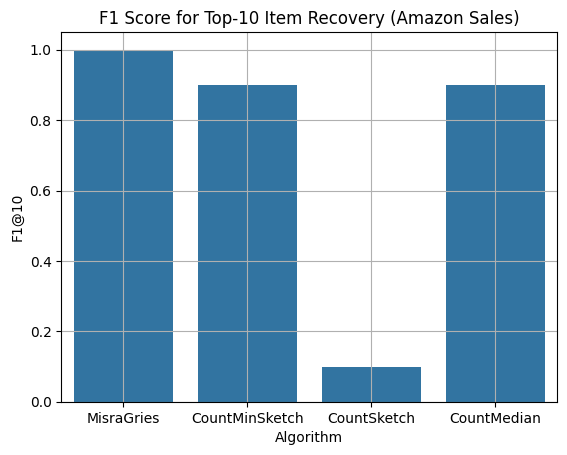

In [11]:
### Visualization
topk_data = [
    {
        "Algorithm": algo,
        "Precision@10": result[algo]["topk"]["precision@k"],
        "Recall@10": result[algo]["topk"]["recall@k"],
        "F1@10": result[algo]["topk"]["f1@k"]
    }
    for algo in result
]

real_df = pd.DataFrame(topk_data)

sns.barplot(data=real_df, x="Algorithm", y="F1@10")
plt.title("F1 Score for Top-10 Item Recovery (Amazon Sales)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()


In [12]:
summary_rows = []

for alg in result:
    errors = result[alg]["errors"]
    abs_errors = [v[2] for v in errors.values()]
    rel_errors = [v[3] for v in errors.values()]
    summary_rows.append({
        "Algorithm": alg,
        "StreamLength": len(stream),
        "MemorySize": memory,
        "MeanAbsError": np.mean(abs_errors),
        "MeanRelError": np.mean(rel_errors),
        "Runtime": result[alg]["runtime"]
    })
summary_rows

[{'Algorithm': 'MisraGries',
  'StreamLength': 110992,
  'MemorySize': 1000,
  'MeanAbsError': np.float64(9.483000842933409),
  'MeanRelError': np.float64(0.8952182100358373),
  'Runtime': 0.058531999588012695},
 {'Algorithm': 'CountMinSketch',
  'StreamLength': 110992,
  'MemorySize': 1000,
  'MeanAbsError': np.float64(36.56434391683057),
  'MeanRelError': np.float64(10.458391397065247),
  'Runtime': 0.7273318767547607},
 {'Algorithm': 'CountSketch',
  'StreamLength': 110992,
  'MemorySize': 1000,
  'MeanAbsError': np.float64(60.46501826355718),
  'MeanRelError': np.float64(17.383586424100272),
  'Runtime': 0.2866649627685547},
 {'Algorithm': 'CountMedian',
  'StreamLength': 110992,
  'MemorySize': 1000,
  'MeanAbsError': np.float64(22.898988479910088),
  'MeanRelError': np.float64(6.536004167577619),
  'Runtime': 1.4722130298614502}]

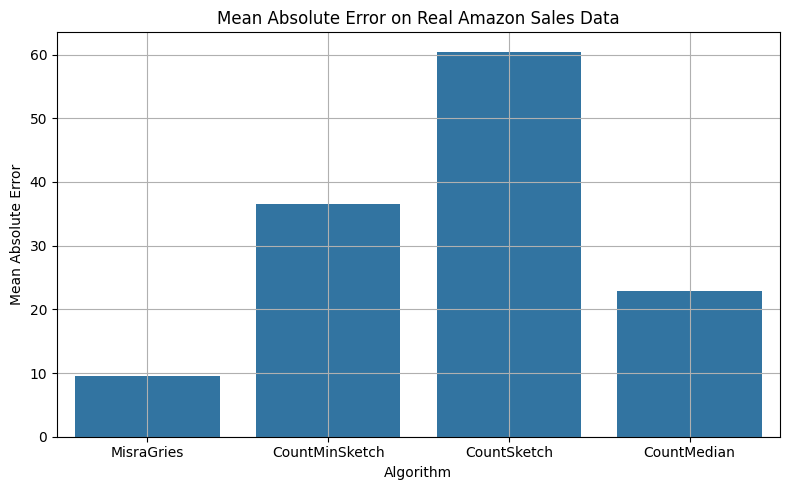

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=pd.DataFrame(summary_rows), x="Algorithm", y="MeanAbsError")
plt.title("Mean Absolute Error on Real Amazon Sales Data")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.tight_layout()
plt.show()

### Experiment with different moduls for CountSketch and CountMinSketch

In [14]:
# keep records
summary_mod_rows = []

memory_sizes = [20, 50, 100, 500, 1000]
depth = 5


for memory in memory_sizes:
    print(f"Running -- Memory: {memory} --")

    mem_config = {
        "misra_gries_k": (memory * depth)//2,
        "sketch_width": memory,
        "sketch_depth": depth
    }

    result = benchmark_all_algos(stream, true_counts, mem_config, prime=True)

    for algo in result:
        errors = result[algo]["errors"]
        topk = result[algo]["topk"]
        abs_errors = [v[2] for v in errors.values()]
        rel_errors = [v[3] for v in errors.values()]
        summary_mod_rows.append({
            "Algorithm": algo,
            "MemorySize": memory,
            "MeanAbsError": np.mean(abs_errors),
            "MeanRelError": np.mean(rel_errors),
            "Runtime": result[algo]["runtime"],
            "Precision@10": topk["precision@k"],
            "Recall@10": topk["recall@k"],
            "F1@10": topk["f1@k"]
        })

Running -- Memory: 20 --
Running -- Memory: 50 --
Running -- Memory: 100 --
Running -- Memory: 500 --
Running -- Memory: 1000 --


In [15]:
# convert to dataframe
sales_approx_mod_df = pd.DataFrame(summary_mod_rows)
display(sales_approx_mod_df)

,Algorithm,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10
0,MisraGries,20,15.587244,0.999771,0.050783,0.1,0.1,0.1
1,CountMinSketch,20,4824.817645,1389.068298,0.723623,0.0,0.0,0.0
2,CountSketch,20,502.000140,144.724653,0.281686,0.0,0.0,0.0
3,CountMedian,20,260.931582,75.703786,1.497747,0.0,0.0,0.0
4,MisraGries,50,15.559146,0.999111,0.048887,0.4,0.4,0.4
5,CountMinSketch,50,1770.536949,510.008330,0.711519,0.2,0.2,0.2
6,CountSketch,50,253.821860,72.184738,0.283859,0.0,0.0,0.0
7,CountMedian,50,177.066732,52.030601,1.501181,0.2,0.2,0.2
8,MisraGries,100,15.418657,0.998172,0.048204,0.7,0.7,0.7
9,CountMinSketch,100,806.069121,231.747175,0.731171,0.3,0.3,0.3


In [17]:
# save file
sales_approx_mod_df.to_csv("../results/sales_approx_mod.csv", index=False)

In [18]:
sales_approx_df["Version"] = "Old"
sales_approx_mod_df["Version"] = "New"

In [38]:
df_combined = pd.concat([sales_approx_df, sales_approx_mod_df])
df_algs = df_combined[df_combined["Algorithm"].isin(["CountMinSketch", "CountSketch"])]
display(df_algs)

,Algorithm,MemorySize,MeanAbsError,MeanRelError,Runtime,Precision@10,Recall@10,F1@10,Version
1,CountMinSketch,20,4870.341950,1399.557169,0.713040,0.0,0.0,0.0,Old
2,CountSketch,20,446.885783,128.228968,0.272520,0.0,0.0,0.0,Old
5,CountMinSketch,50,1774.043552,509.944661,0.704581,0.1,0.1,0.1,Old
6,CountSketch,50,273.523462,79.132923,0.276399,0.0,0.0,0.0,Old
9,CountMinSketch,100,801.737567,230.749693,0.700016,0.5,0.5,0.5,Old
10,CountSketch,100,216.317364,62.581577,0.280171,0.0,0.0,0.0,Old
13,CountMinSketch,500,104.533858,30.102231,0.740462,0.9,0.9,0.9,Old
14,CountSketch,500,91.926384,27.029221,0.289849,0.0,0.0,0.0,Old
17,CountMinSketch,1000,36.564344,10.458391,0.727332,0.9,0.9,0.9,Old
18,CountSketch,1000,60.465018,17.383586,0.286665,0.1,0.1,0.1,Old


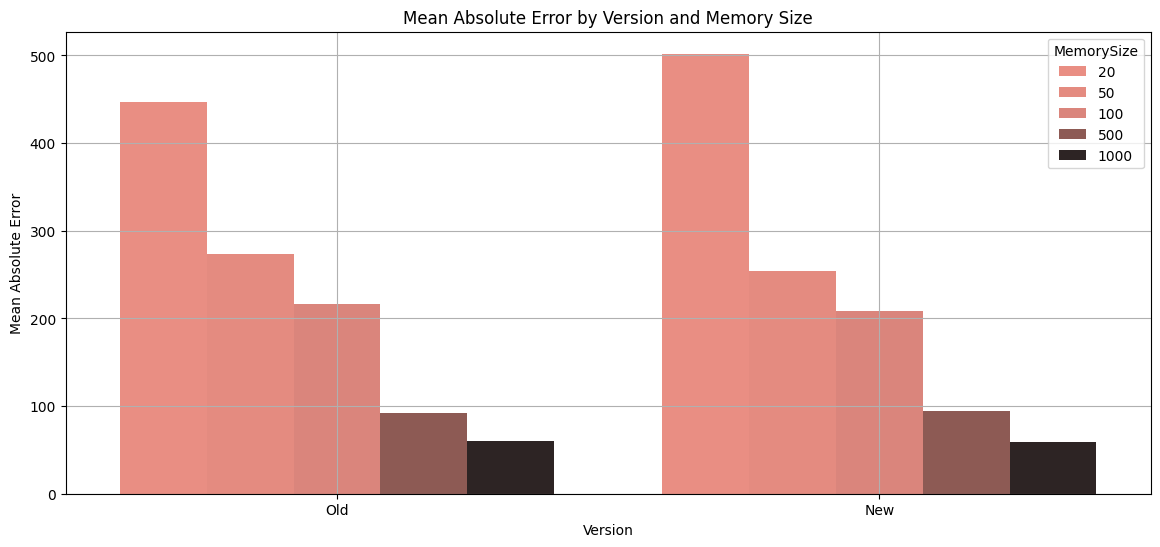

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_algs[df_algs["Algorithm"] == "CountSketch"],
    x='Version',
    y='MeanAbsError',
    hue='MemorySize',
    palette='dark:salmon_r'
)
plt.title('Mean Absolute Error by Version and Memory Size')
plt.xlabel('Version')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

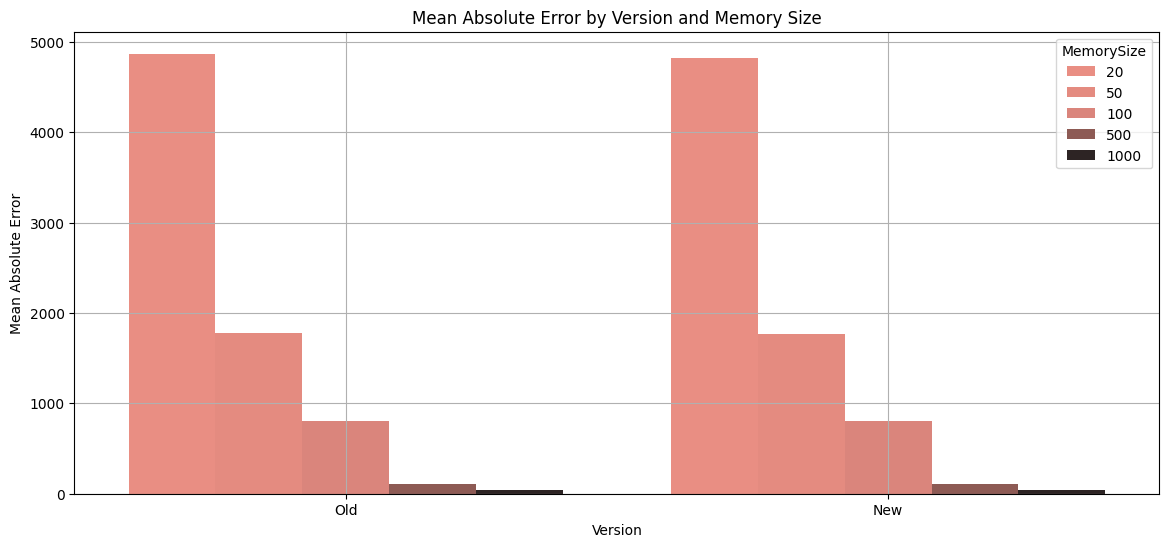

In [41]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_algs[df_algs["Algorithm"] == "CountMinSketch"],
    x='Version',
    y='MeanAbsError',
    hue='MemorySize',
    palette='dark:salmon_r'
)
plt.title('Mean Absolute Error by Version and Memory Size')
plt.xlabel('Version')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()